Welcome and please:

In [1]:
import numpy as np

## Basic tricks

1. Given array $a_0$ that contains integers and indicator array $X$. Return:

a) boolean array $b_0 = \left[\left\{\begin{array}{ll} \text{True,} & x \in A\\ \text{False,} & x \notin A \end{array}\right. \quad\text{for $x$ in $X$} \right]$

b) list of boolean arrays $b_0, b_1, ..., b_n$ if there are multiple arrays $a_0, a_1, ..., a_n$ given.

Source: [my question](https://stackoverflow.com/questions/59656759/what-is-a-best-way-to-intersect-multiple-arrays-with-numpy-array)

In [17]:
X = np.array([2,5,0,4,3,1])
A = [np.array([-2,0,2]), np.array([0,1,2,3,4,5]), np.array([2,5,4,6])]

print(np.isin(A[0], X))

Xs, B = np.sort(X), []
for a in A:
    idx = np.searchsorted(Xs, a) #locations where to append items of a in X
    idx[idx==len(Xs)] = 0
    print(idx)
    B.append(Xs[idx]==a)
print(B)

#question: what about np.searchsorted(Xs, a, sorter=np.argsort(X))?

[False  True  True]
[0 0 2]
[0 1 2 3 4 5]
[2 5 4 0]
[array([False,  True,  True]), array([ True,  True,  True,  True,  True,  True]), array([ True,  True,  True, False])]


2. Given array of people descriptions. Replace it by labels 0, 1, ... , each of them corresponds to alphabetical order.

In [20]:
X = np.array(['Female', 'Female', 'Female', 'Baby', 'Female', 'Male', 'Male', 'Female', 'Senior', 'Male', 'Male', 'Male', 'Female', 'Female', 'Female', 'Male', 'Male',
 'Senior', 'Senior', 'Female'])
u, rinv = np.unique(X, return_inverse=True)
print(rinv)

#Alternative way:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
print(le.fit_transform(rinv)) 

[1 1 1 0 1 2 2 1 3 2 2 2 1 1 1 2 2 3 3 1]
[1 1 1 0 1 2 2 1 3 2 2 2 1 1 1 2 2 3 3 1]


3. An array $X_{x_i}$ of length $n$ is called indicator of term $x_i$ if it's $i$-th item is 1 an any other item is 0. Given an array that contains $n$ distinct countries $c_1$, $c_2$, $c_3$, ..., $c_n$ that might repeat. Replace each of them by indicator array of length $n$. Hint: [numpy broadcasting](https://numpy.org/doc/stable/user/basics.broadcasting.html)

In [50]:
countries = np.array(['France', 'Spain', 'France', 'France', 'Spain', 'Spain', 'France',
       'Germany', 'France', 'France', 'France', 'Spain', 'France',
       'France', 'Spain', 'Germany', 'Germany', 'Spain', 'Spain',
       'France'])
countries_indicator = (countries[:,None] == np.unique(countries)).astype(int) # creating indicator array
print(countries_indicator)

[[1 0 0]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [0 0 1]
 [1 0 0]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [1 0 0]]


4. Given two equal sized 1D arrays $X$ and $Y$ with nonnegative items smaller than $m$ and 2D array $Z$ of size $m \times m$. Return array that contains $Z_{X_i, Y_i}$ for each $i\le m$.

In [46]:
Z = np.arange(25).reshape((5,5))
X, Y = np.array([0, 1, 3, 4, 4]), np.array([0, 1, 3, 3, 4])
Z[X, Y]

array([ 0,  6, 18, 23, 24])

5. Given two equal sized 1D arrays $X$ and $Y$ with nonnegative items smaller than $m$ and 2D array $Z$ of size $m \times m$. Return sub-array of $Z$ that contains rows with indexes taken from $X$ and columns that contains indexes taken from $Y$.

In [52]:
Z = np.arange(25).reshape((5,5))
X, Y = np.array([0, 1, 3, 4, 4]), np.array([0, 1, 3, 3, 4])
Z[np.ix_(X, Y)]

array([[ 0,  1,  3,  3,  4],
       [ 5,  6,  8,  8,  9],
       [15, 16, 18, 18, 19],
       [20, 21, 23, 23, 24],
       [20, 21, 23, 23, 24]])

6. Vectorise Python function `product(*arrays)`

In [41]:
def product1(arrays):
    return np.stack(np.meshgrid(*arrays), axis=-1).reshape(-1, len(arrays))
def product2(X):
    items = [np.array(item) for item in X]
    idx = np.where(np.eye(len(X)), Ellipsis, None)
    out = [x[tuple(i)] for x,i in zip(items, idx)]
    return list(np.broadcast(*out))

product2([[4,3,1],[2,4,0],[0,1,2]])

[(4, 2, 0),
 (4, 2, 1),
 (4, 2, 2),
 (4, 4, 0),
 (4, 4, 1),
 (4, 4, 2),
 (4, 0, 0),
 (4, 0, 1),
 (4, 0, 2),
 (3, 2, 0),
 (3, 2, 1),
 (3, 2, 2),
 (3, 4, 0),
 (3, 4, 1),
 (3, 4, 2),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2)]

7. Convert iterable `combinations(range(n), k)` to `numpy` array with fastest possible performance. [Source](https://stackoverflow.com/a/63694661/3044825)

In [31]:
from itertools import combinations

def fromiter(iterable, k):
    dt = np.dtype([('', np.intp)]*k) #or np.dtype(','.join('i'*5))
    indices = np.fromiter(iterable, dt)
    indices = indices.view(np.intp).reshape(-1, k)
    return indices

fromiter(combinations(range(5), 3), 3)

array([[0, 1, 2],
       [0, 1, 3],
       [0, 1, 4],
       [0, 2, 3],
       [0, 2, 4],
       [0, 3, 4],
       [1, 2, 3],
       [1, 2, 4],
       [1, 3, 4],
       [2, 3, 4]], dtype=int64)

8. Given boolean array, return indices where subarray `[True, False, True]` appears.

In [ ]:
def rolling(a, window):
    shape = (a.size - window + 1, window)
    strides = (a.itemsize, a.itemsize)
    return np.lib.stride_tricks.as_strided(a, shape=shape, strides=strides)

compare_with = [True, False, True]
bool_arr = np.random.choice([True, False], size=20)
rolls = rolling(bool_arr, len(compare_with))
idx = np.where(np.all(rolls == compare_with, axis=1))

9. Solve Diophantine equation `3x+7y+10z=60`

In [43]:
l = np.array([3,7,10])
s = 60
unknowns = [range(0, s+1, n) for n in l]
triplets = product1(unknowns) #defined as an exerscise before
suitable_triplets = triplets[np.sum(triplets, axis=1) == s]
solutions = suitable_triplets//l
print(solutions)

[[ 0  0  6]
 [10  0  3]
 [20  0  0]
 [ 1  1  5]
 [11  1  2]
 [ 2  2  4]
 [12  2  1]
 [ 3  3  3]
 [13  3  0]
 [ 4  4  2]
 [ 5  5  1]
 [ 6  6  0]]


10. Let $L_i(A)$ define the first item of array `A` which doesn't exceed `i`. A sequence $L_{0}(Y), L_{1}(Y), ..., L_{len(X)-1}(Y)$ is called [`left_argmins`](https://stackoverflow.com/questions/63476467/find-argmin-to-the-left-right-of-each-index-in-array) of `X` if `Y` is a sequence of indices that would sort an array `X`. Find `leftt_argmins` of `X`.  What about `right_argmins` of `X`?

In [ ]:
X = np.array([7, 5, 4, 1, 9, 2, 3, 6])
argidx = np.argsort(x)
u, idx = np.unique(argidx, return_index=True)
left_argmins = argidx[np.minimum.accumulate(idx)]
right_argmins = argidx[np.minimum.accumulate(idx[::-1])][::-1]
print(left_argmins)

11. * Given an array `X` and replacement array `Y` of shape `(n, 2)`. Replace all the items of `X` that have corresponding mappings available. [Source](https://stackoverflow.com/questions/53155749/replace-elements-in-numpy-array-avoiding-loops)

In [27]:
X = np.array([0,1,2,5,4,4])
Y = np.array([[0,1],[1,2],[3,300],[4,400],[2,200]])

def replacer(X, Y):
    #not vectorized yet
    print([Y[Y[:,0]==i, 1][0] if i in Y[:,0] else i for i in X])
replacer(X, Y)
        
# def replacer(X, Y):
# sidx = Y[:,0].argsort()
# print('sidx', sidx)
# sorted_indx = np.searchsorted(Y[:,0], X, sorter=sidx) #where to add items from X in sorted Y to keep ascending order
# print('sorted_indx', sorted_indx)
# sorted_indx[sorted_indx==len(sidx)] = -1
# print('sorted_indx', sorted_indx)
# idx_out = sidx[sorted_indx]
# print('idx_out', idx_out)
# out = Y[idx_out,1]
# print('out', out)
# out[Y[idx_out, 0]!=X] = 0
# print('out', out)


[1, 2, 200, 5, 400, 400]


## Grouping

1. Extract groups of array by first column.

In [50]:
a = np.array([[1, 275], [1, 441], [1, 494], [1, 593], [2, 679], [2, 533], [2, 686], [3, 559], [3, 219], [3, 455], [4, 605], [4, 468], [4, 692], [4, 613]])

#Way1
a.sort(axis=0)
u, idx = np.unique(a[:,0], return_index = True) #idx = [0, 4, 7, 10]
print(np.split(a[:,1], idx)[1:])

#Way2
a.sort(axis=0)
u, cnt = np.unique(a[:, 0], return_counts=True) #cnt = [4, 3, 3, 4]
idx = np.cumsum(cnt)[:-1]
print(np.split(a[:,1], idx)[1:])

#Way3
import numpy_indexed as npi
print(npi.group_by(a[:, 0]).split(a[:, 1]))

[array([219, 275, 441, 455]), array([468, 494, 533]), array([559, 593, 605]), array([613, 679, 686, 692])]
[ 4  7 10 14]


2. Group array by first column and leave only the rows where second column attains maximum. [Source](https://stackoverflow.com/a/63758412/3044825)

In [35]:
import numpy as np
a = np.array([[2,6],[1,4],[0,1],[1,1],[2,3],[0,2]])
a = a[np.argsort(a[:,0])] #sorting lst by first row
u, idx = np.unique(a[:,0], return_index = True) 
print(np.c_[u, np.maximum.reduceat(a[:,1], idx)])

import numpy_indexed as npi
print(np.transpose(npi.group_by(a[:, 0]).max(a[:, 1])))

[[0 2]
 [1 4]
 [2 6]]
[[0 2]
 [1 4]
 [2 6]]


3. Group array by first column and sum groups by second column (not using reduceat). [Source](https://stackoverflow.com/a/63750626/3044825)

In [39]:
def group_by_sum(x):
    u, idx = np.unique(x[:,0], return_inverse=True)
    s = np.bincount(idx, weights = x[:,1])
    return np.c_[u, s]

x = np.array([[1.2, 10], [2.3, 20], [1.2, 30], [2.3, 7]])
#group_by_sum(x)
np.transpose(npi.group_by(x[:, 0]).sum(x[:, 1]))

array([[ 1.2, 40. ],
       [ 2.3, 27. ]])

## More

11. Let `X` and `Y` be two polynomials. Each of the polynomials consists of two rows: powers and coeffs, no zero coeffs. Return a new polynomial `X` $\times$ `Y`

In [45]:
import numpy_indexed as npi
X = np.array([[0,1],[1,1]])
Y = np.array([[0,1,2],[1,1,1]])
cells = product1([X[0], Y[0]]) #finding pairs of powers
degs = np.sum(cells, axis=1) #summing each pair to get new power
coeffs = X[1][cells[:, 0]] * Y[1][cells[:, 1]] #multiplying corresponding coeffs
terms = np.column_stack([coeffs, degs]) #result as terms
print(np.array(npi.group_by(terms[:, 1]).sum(terms[:,0]))) #reduce similar terms

[[0 1 2 3]
 [1 2 2 1]]


15. Given a bunch of groups of ids, return:
 - list of connected groups (numpy arrays)
 - ids that tells which groups are connected
 
 Source: [my ccarray compilation](..\ccarray.pdf)

In [5]:
import numpy as np
import pandas as pd
import igraph as ig

def connect_arrays(arrays, return_groups=True):
    conc = np.concatenate(arrays)
    u, indices = np.unique(conc, return_inverse=True)
    bars = [len(n) for n in arrays[:-1]]
    bars[0] -= 1
    mask = np.ones(len(indices) - 1, dtype=bool)
    mask[np.cumsum(bars)] = False
    nodes = np.arange(len(u))
    edges = (np.array([indices[1:], indices[:-1]]).T)[mask]
    graph = ig.Graph()
    graph.add_vertices(nodes)
    graph.add_edges(edges)
    graph_tags = graph.clusters().membership
    values = pd.DataFrame(graph_tags).groupby([0]).indices.values()
    
    if return_groups:
        graph_tags = np.array(graph_tags)
        pid = [n[0] if len(n) else u[-1] + 1 for n in
               arrays]  # if items is zero, add non-existent item larger than any
        group_ix = np.searchsorted(u, pid)
        bad_indexes = group_ix == len(u)
        group_ix[bad_indexes] = 0  # stuff I forced to do to avoid index error
        group_tags = graph_tags[group_ix]
        group_tags = group_tags.astype(float)
        group_tags[bad_indexes] = np.nan
        groups = pd.DataFrame(group_tags).groupby([0]).indices.values()
        return [u[k] for k in values], groups
    else:
        return [u[k] for k in values]

connect_arrays([[1,2],[2,3],[3,4],[4,5]], return_groups=True)

([array([1, 2, 3, 4, 5])], dict_values([array([0, 1, 2, 3], dtype=int64)]))

## Images

Let us generate a random `image` using these lines:

In [6]:
x, y = np.meshgrid(np.linspace(-np.pi/2, np.pi/2, 30), np.linspace(-np.pi/2, np.pi/2, 30))
image = np.sin(x**2+y**2)[:-1,:-1] > 0.9
print(image.astype(int))

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0]
 [0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0]
 [0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0]
 [0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0]
 [0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0]
 [0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0]
 [0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0]
 [0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0]
 [0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0]
 [0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0]
 [0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0]
 [0 0 1 1 1 0 0 0 0 0 0 

12. Given a binary `image`, return array of its contour positions (pip instal opencv-python instead of conda install)

In [4]:
#converting extracting contours
import cv2
image = image.astype(np.uint8)
contours, hierarchy = cv2.findContours(image, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
cells = np.vstack(contours).squeeze() #change shape
print(cells)

[[11  2]
 [10  3]
 [ 9  3]
 [ 8  4]
 [ 7  4]
 [ 6  5]
 [ 5  6]
 [ 4  7]
 [ 4  8]
 [ 3  9]
 [ 3 10]
 [ 2 11]
 [ 2 12]
 [ 2 13]
 [ 2 14]
 [ 2 15]
 [ 2 16]
 [ 2 17]
 [ 2 18]
 [ 3 19]
 [ 3 20]
 [ 4 21]
 [ 4 22]
 [ 5 23]
 [ 6 24]
 [ 7 25]
 [ 8 25]
 [ 9 26]
 [10 26]
 [11 27]
 [12 27]
 [13 27]
 [14 27]
 [15 27]
 [16 27]
 [17 27]
 [18 27]
 [19 26]
 [20 26]
 [21 25]
 [22 25]
 [23 24]
 [24 23]
 [25 22]
 [25 21]
 [26 20]
 [26 19]
 [27 18]
 [27 17]
 [27 16]
 [27 15]
 [27 14]
 [27 13]
 [27 12]
 [27 11]
 [26 10]
 [26  9]
 [25  8]
 [25  7]
 [24  6]
 [23  5]
 [22  4]
 [21  4]
 [20  3]
 [19  3]
 [18  2]
 [17  2]
 [16  2]
 [15  2]
 [14  2]
 [13  2]
 [12  2]
 [12  5]
 [13  4]
 [14  4]
 [15  4]
 [16  4]
 [17  5]
 [18  5]
 [19  5]
 [20  6]
 [21  7]
 [22  8]
 [23  9]
 [24 10]
 [24 11]
 [24 12]
 [25 13]
 [25 14]
 [25 15]
 [25 16]
 [24 17]
 [24 18]
 [24 19]
 [23 20]
 [22 21]
 [21 22]
 [20 23]
 [19 24]
 [18 24]
 [17 24]
 [16 25]
 [15 25]
 [14 25]
 [13 25]
 [12 24]
 [11 24]
 [10 24]
 [ 9 23]
 [ 8 22]
 [ 7 21]
 

13. Given a binary image, return locations of all the units.

In [33]:
x, y = np.indices(image.shape)
mask = image == 1
location = np.array([x[mask], y[mask]]).T
print(location)

#Alternative way 1:

from scipy import sparse
sparsed_image = sparse.csr_matrix(image)
print(np.array(sparsed_image.nonzero()).T)

#Alternative way 2:

print(np.array(image.nonzero()).T)

#Alternative way 3:

print(np.array(np.where(image)).T)

[[ 2 11]
 [ 2 12]
 [ 2 13]
 [ 2 14]
 [ 2 15]
 [ 2 16]
 [ 2 17]
 [ 2 18]
 [ 3  9]
 [ 3 10]
 [ 3 11]
 [ 3 12]
 [ 3 13]
 [ 3 14]
 [ 3 15]
 [ 3 16]
 [ 3 17]
 [ 3 18]
 [ 3 19]
 [ 3 20]
 [ 4  7]
 [ 4  8]
 [ 4  9]
 [ 4 10]
 [ 4 11]
 [ 4 12]
 [ 4 13]
 [ 4 14]
 [ 4 15]
 [ 4 16]
 [ 4 17]
 [ 4 18]
 [ 4 19]
 [ 4 20]
 [ 4 21]
 [ 4 22]
 [ 5  6]
 [ 5  7]
 [ 5  8]
 [ 5  9]
 [ 5 10]
 [ 5 11]
 [ 5 12]
 [ 5 17]
 [ 5 18]
 [ 5 19]
 [ 5 20]
 [ 5 21]
 [ 5 22]
 [ 5 23]
 [ 6  5]
 [ 6  6]
 [ 6  7]
 [ 6  8]
 [ 6  9]
 [ 6 20]
 [ 6 21]
 [ 6 22]
 [ 6 23]
 [ 6 24]
 [ 7  4]
 [ 7  5]
 [ 7  6]
 [ 7  7]
 [ 7  8]
 [ 7 21]
 [ 7 22]
 [ 7 23]
 [ 7 24]
 [ 7 25]
 [ 8  4]
 [ 8  5]
 [ 8  6]
 [ 8  7]
 [ 8 22]
 [ 8 23]
 [ 8 24]
 [ 8 25]
 [ 9  3]
 [ 9  4]
 [ 9  5]
 [ 9  6]
 [ 9 23]
 [ 9 24]
 [ 9 25]
 [ 9 26]
 [10  3]
 [10  4]
 [10  5]
 [10 24]
 [10 25]
 [10 26]
 [11  2]
 [11  3]
 [11  4]
 [11  5]
 [11 24]
 [11 25]
 [11 26]
 [11 27]
 [12  2]
 [12  3]
 [12  4]
 [12  5]
 [12 24]
 [12 25]
 [12 26]
 [12 27]
 [13  2]
 [13  3]
 [13  4]
 

14. An image is made of $29 \times 29$ array. Convert it to a more efficient memory data structure.

In [35]:
from scipy import sparse
sparsed_image = sparse.csr_matrix(image) #this is a data structure that stores rows and columns only, 30% of cells only
image2 = sparsed_image.todense() #convert back to array

## Save and retrieve it

9. Save array and retrieve it

In [ ]:
x = np.random.randint(0,10, size=(100,100))
np.save(file='data.npy', x)
retrieved_array = np.load('data.npy')

np.savez_compressed('data.npz', array=x) #not compressed: data.npz
retrieved_array = np.load('data.npz')['array']

10. Dowload a huge .npz file with 3 column array straight from github and perform dimensionality reduction on it using `numexpr`.

In [29]:
import tensorflow as tf
import numexpr as ne
path = tf.keras.utils.get_file('cubes.npz', 'https://github.com/loijord/lidar_home/raw/master/cubes.npz')
cubes = np.load(path)['array']
cubes = cubes.astype(np.int64)
s0, s1 = cubes[:,0].max()+1, cubes[:,1].max()+1
d = {'s0':s0,'s1':s1,'c0':cubes[:,0],'c1':cubes[:,1],'c2':cubes[:,2]}
c1D = ne.evaluate('c0+c1*s0+c2*s0*s1',d)
print(c1D.shape)

(19488504,)


11. Now you've got `C1D` array, can you show a list of groups as like as you do with `pd.DataFrame(cubes).groupby([0]).indices`? [Source](https://stackoverflow.com/q/59239886/3044825)

### Future asks:
* [About justification](https://github.com/numpy/numpy/issues/15863)
* [Fill missing values according to frequency](https://stackoverflow.com/questions/63548053/)
* [Link lists that share common elements](https://stackoverflow.com/questions/63583725/)
* [Replace groups of cells by their averages](https://stackoverflow.com/questions/63618938)
* [how to replace all the items of array by indexes of specified lists](stackoverflow.com/questions/63623869/) also used in tagging cc in networkx
* [`np.isin` in 2D case](https://stackoverflow.com/questions/51352527) [update: it is needed to solve problem in conjunction with product]

# More future asks:

* Kerneling image
* Zoom of image
* Visualiser of numpy array dimensions, [like in this source](https://papers.bastolasushan.com/what-are-tensors/), or [this](https://beerensahu.wordpress.com/2018/03/21/pytorch-tutorial-lesson-1-tensor/)
* Construct a kernel from given values of its radius.
* Interactive (clickable) graphs.
* Create graph from 3D sparse matrix, actually pointcloud.
* How to intersect 3d matrices faster that it does `numpy` indexed (assuming I understand what is view, ravel, etc.)
* Vectorise `[A.index(b) for b in B]`
* Review of nxviz library
* Review of numpy_indexed library
* Study @Divakar's post with `numba` and `np.ravel()` [Source](https://stackoverflow.com/q/59239886/3044825)
* Study [answers](https://stackoverflow.com/q/63623869/3044825) of how to replace all the items of array by indexes of specified lists? They contain `np.apply_along_axis`, `np.searchsorted` and similar tricks.

## A wonderful [explanation](https://towardsdatascience.com/numpy-indexing-explained-c376abb2440d) of `numpy` indexing

## Illustration of 3D arrays

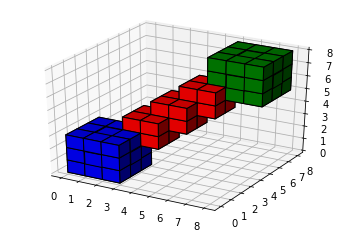

In [71]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# prepare some coordinates
x, y, z = np.indices((8, 8, 8))

# draw cuboids in the top left and bottom right corners, and a link between them
cube1 = (x < 3) & (y < 3) & (z < 3)
cube2 = (x >= 5) & (y >= 5) & (z >= 5)
link = abs(x - y) + abs(y - z) + abs(z - x) <= 2

# combine the objects into a single boolean array
voxels = cube1 | cube2 | link

# set the colors of each object
colors = np.empty(voxels.shape, dtype=object)
colors[link] = 'red'
colors[cube1] = 'blue'
colors[cube2] = 'green'

# and plot everything
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.voxels(voxels, facecolors=colors, edgecolor='k')

plt.show()



In [199]:
a = np.arange(60).reshape(3,4,5)

## Measuring performance of combinations

 75%|██████████████████████████████████████████████████████████████████████████████████████████▊                              | 3/4 [00:00<00:00,  4.31it/s]


  0%|                                                                                                                                 | 0/4 [00:00<?, ?it/s]


 50%|████████████████████████████████████████████████████████████▌                                                            | 2/4 [00:00<00:00,  3.45it/s]


 50%|████████████████████████████████████████████████████████████▌                                                            | 2/4 [00:00<00:00,  2.35it/s]


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  2.86it/s]


 50%|████████████████████████████████████████████████████████████▌                                                            | 2/4 [00:01<00:01,  1.21it/s]


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 19/19 [00:40<00:00,  2.14s/it]


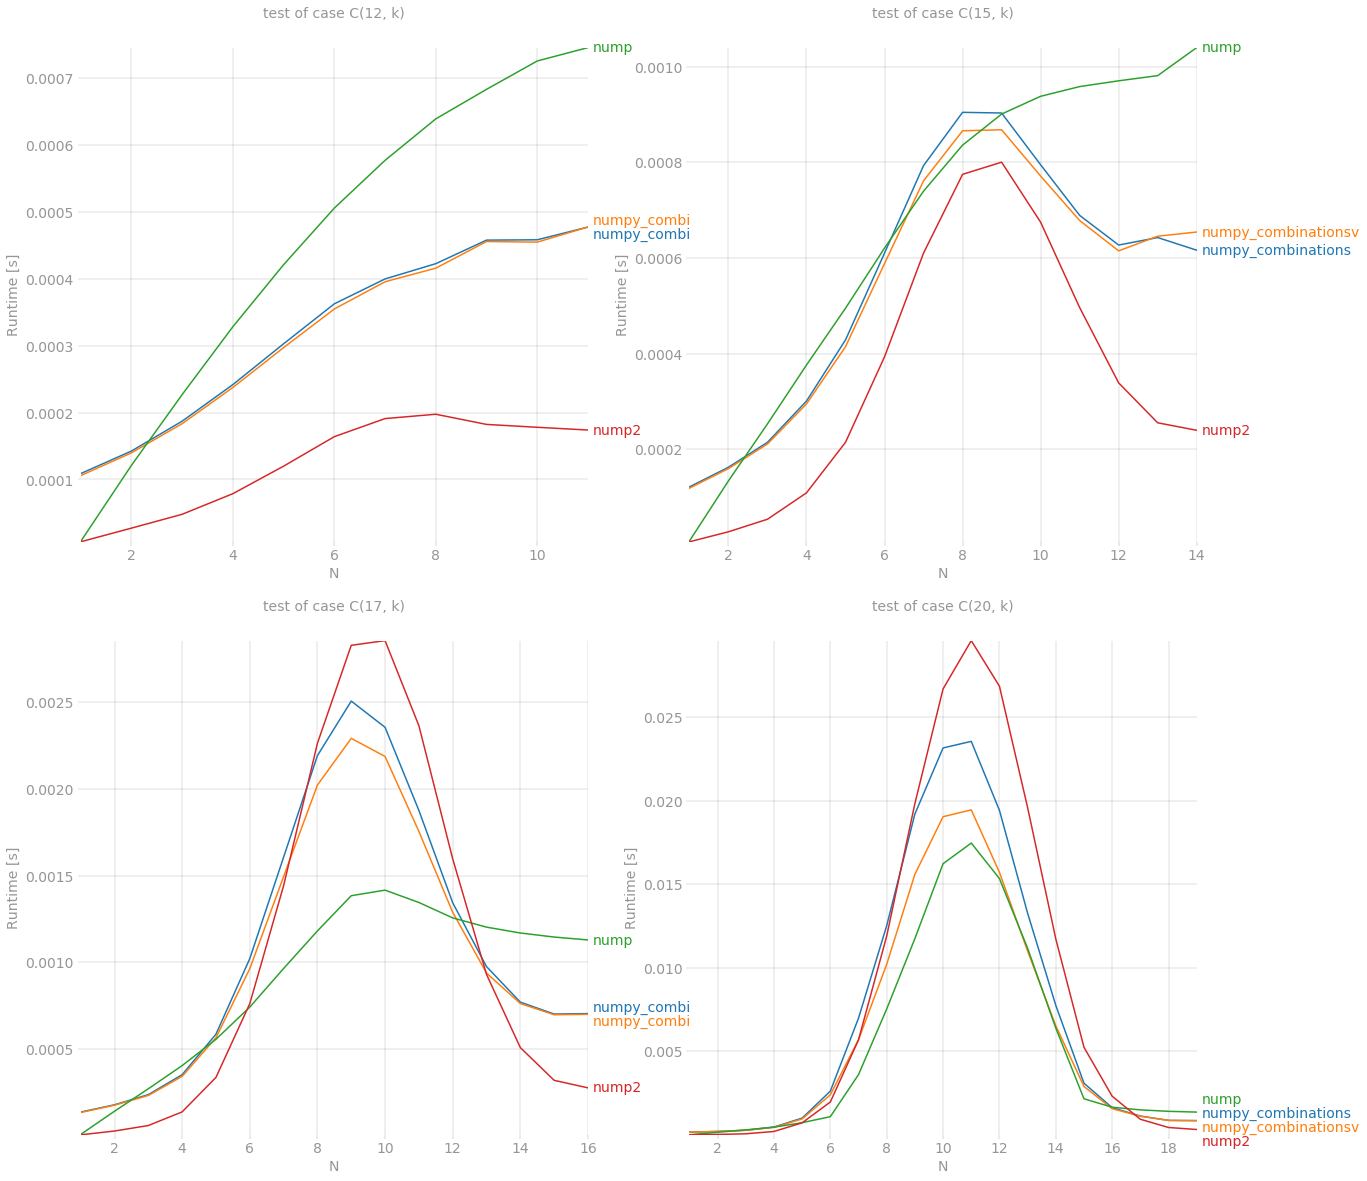

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import perfplot
from itertools import chain, combinations
from scipy.special import comb
from scipy.linalg import pascal

def C(n, k):  # huge memory overload...
    if k == 0:
        return np.array([])
    if k == 1:
        return np.arange(1, n + 1)
    elif k == 2:
        return np.less.outer(np.arange(n), np.arange(n))
    else:
        x = C(n, k - 1)
        X = np.repeat(x[None, :, :], len(x), axis=0)
        Y = np.repeat(x[:, :, None], len(x), axis=2)
        return X & Y

def C_indices(data):
    n, k = data
    return np.transpose(np.nonzero(C(n, k)))

def comb_index(data):
    n, k = data
    count = comb(n, k, exact=True)
    index = np.fromiter(chain.from_iterable(combinations(range(n), k)),
                        int, count=count * k)
    return index.reshape(-1, k)

def stretch(a, k):
    l = a.sum()+len(a)*(-k)
    out = np.full(l, -1, dtype=int)
    out[0] = a[0]-1
    idx = (a-k).cumsum()[:-1]
    out[idx] = a[1:]-1-k
    return out.cumsum()

def numpy_combinations(data):
    #print(data)
    n, k = data
    x = np.array([n])
    P = pascal(n).astype(int)
    C = []
    for b in range(k-1,-1,-1):
        x = stretch(x, b)
        r = P[b][x - b]
        C.append(np.repeat(x, r))
    return n - 1 - np.array(C).T

def numpy_combinationsv(data):
    #print(data)
    n, k = data
    x = np.array([n])
    P = pascal(n).astype(int)
    C = []
    for b in range(k-1,-1,-1):
        x = stretch(x, b)
        r = P[b][x - b]
        C.append(np.repeat(x, r))
    return np.array(C).T

def nump(data, i=0):
    n, k = data
    i = 0
    if k == 1:
        a = np.arange(i, i+n)
        return tuple([a[None, j:] for j in range(n)])
    template = nump((n-1, k-1), i+1)
    full = np.r_[np.repeat(np.arange(i, i+n-k+1),
                           [t.shape[1] for t in template])[None, :],
                 np.c_[template]]
    return tuple([full[:, j:] for j in np.r_[0, np.add.accumulate(
        [t.shape[1] for t in template[:-1]])]])

def nump2(data, i=0):
    n, k = data
    a = np.ones((k, n-k+1), dtype=int)
    a[0] = np.arange(n-k+1)
    for j in range(1, k):
        reps = (n-k+j) - a[j-1]
        a = np.repeat(a, reps, axis=1)
        ind = np.add.accumulate(reps)
        a[j, ind[:-1]] = 1-reps[1:]
        a[j, 0] = j
        a[j] = np.add.accumulate(a[j])
    return a


def build_args(k):
    return {'setup': lambda x: (k, x),
            'kernels': [numpy_combinations, numpy_combinationsv, nump, nump2],
            'n_range': [x for x in range(1, k)],
            'xlabel': f'N',
            'title': f'test of case C({k}, k)',
            'show_progress': True,
            'equality_check': False}

outs = [perfplot.bench(**build_args(n)) for n in (12, 15, 17, 20)]
fig = plt.figure(figsize=(20, 20))
for i in range(len(outs)):
    ax = fig.add_subplot(2, 2, i + 1)
    ax.grid(True, which="both")
    outs[i].plot()
plt.show()

In [46]:
def stretch(a, k):
    l = a.sum()+len(a)*(-k)
    out = np.full(l, -1, dtype=int)
    out[0] = a[0]-1
    idx = (a-k).cumsum()[:-1]
    out[idx] = a[1:]-1-k
    return out.cumsum()

def numpy_combinations(data):
    #print(data)
    n, k = data
    x = np.array([n])
    P = pascal(n).astype(int)
    C = []
    for b in range(k-1,-1,-1):
        x = stretch(x, b)
        r = P[b][x - b]
        C.append(np.repeat(x, r))
    return n - 1 - np.array(C).T

numpy_combinations((5,3))

array([[0, 1, 2],
       [0, 1, 3],
       [0, 1, 4],
       [0, 2, 3],
       [0, 2, 4],
       [0, 3, 4],
       [1, 2, 3],
       [1, 2, 4],
       [1, 3, 4],
       [2, 3, 4]], dtype=int32)